## 1. Pustaka Program Decision Tree


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Loading Dataset


In [3]:
df = pd.read_csv('/content/college.csv' )
df.head()

,StudentID,Gender,Parent_income,IQ,Encourage,Plan
0,4558,male,53900,118,encourage,plan
1,4561,female,24900,87,not encourage,not plan
2,4563,female,65800,93,not encourage,not plan
3,4565,male,11440,117,encourage,plan
4,4567,female,16700,102,not encourage,not plan


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


# 3. Data Preprocessing


## Check Missing Value


In [5]:
# Check Missing Value
df.isnull().sum()


,0
StudentID,0
Gender,0
Parent_income,0
IQ,0
Encourage,0
Plan,0


## Cek dan Hapus Data Duplikat


In [6]:
# Check data duplicate
df.duplicated().sum()

np.int64(0)

In [7]:
# Menghapus data duplicated
df = df.drop_duplicates()

In [8]:
# dek duplikat ulang setelah menghapus
# Check data duplicate
df.duplicated().sum()

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StudentID      8000 non-null   int64 
 1   Gender         8000 non-null   object
 2   Parent_income  8000 non-null   int64 
 3   IQ             8000 non-null   int64 
 4   Encourage      8000 non-null   object
 5   Plan           8000 non-null   object
dtypes: int64(3), object(3)
memory usage: 375.1+ KB


# 4. Data Understanding (Exploratory Data Analysis)


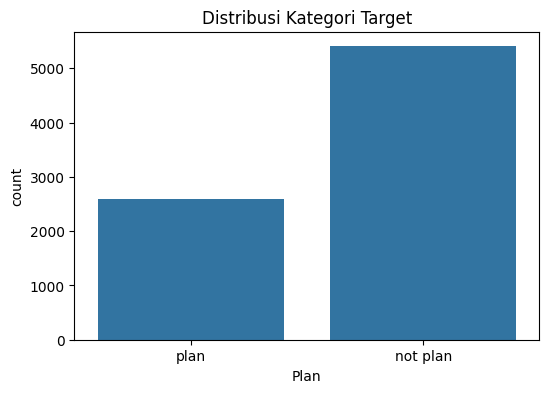

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x=df.columns[-1], data=df)
plt.title('Distribusi Kategori Target')
plt.show()

# 5. Encoding Data Kategorikal (Mapping Label ke Kode Numerik)


In [16]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category').cat.codes


# 6. Analisis Korelasi Antar Fitur


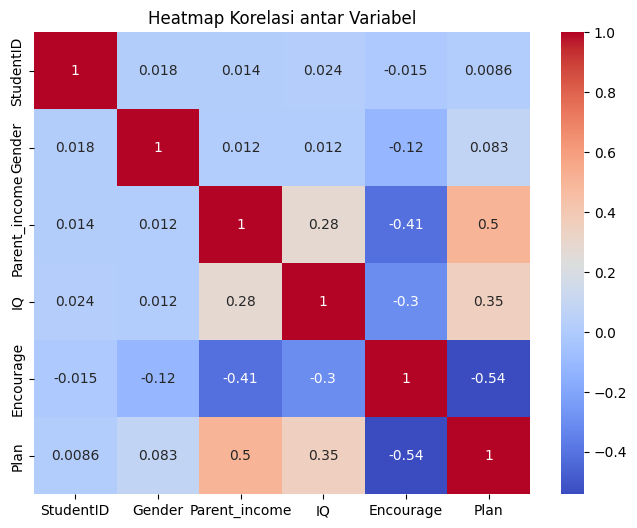

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi antar Variabel')
plt.show()

# **7. Splitting Data (Pembagian Data Training dan Testing)**


In [18]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing :", X_test.shape[0])

Jumlah data training: 6400
Jumlah data testing : 1600


# **8.Pembuatan Model Decision Tree**


In [27]:
model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

# **9.  Evaluasi Model Decision Tree**



In [28]:
y_pred = model.predict(X_test)

print("\nAkurasi Model:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi Model: 0.82625

Confusion Matrix:
 [[960 121]
 [157 362]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1081
           1       0.75      0.70      0.72       519

    accuracy                           0.83      1600
   macro avg       0.80      0.79      0.80      1600
weighted avg       0.82      0.83      0.82      1600



# **10. Visualisasi Hasil Model Decision Tree**


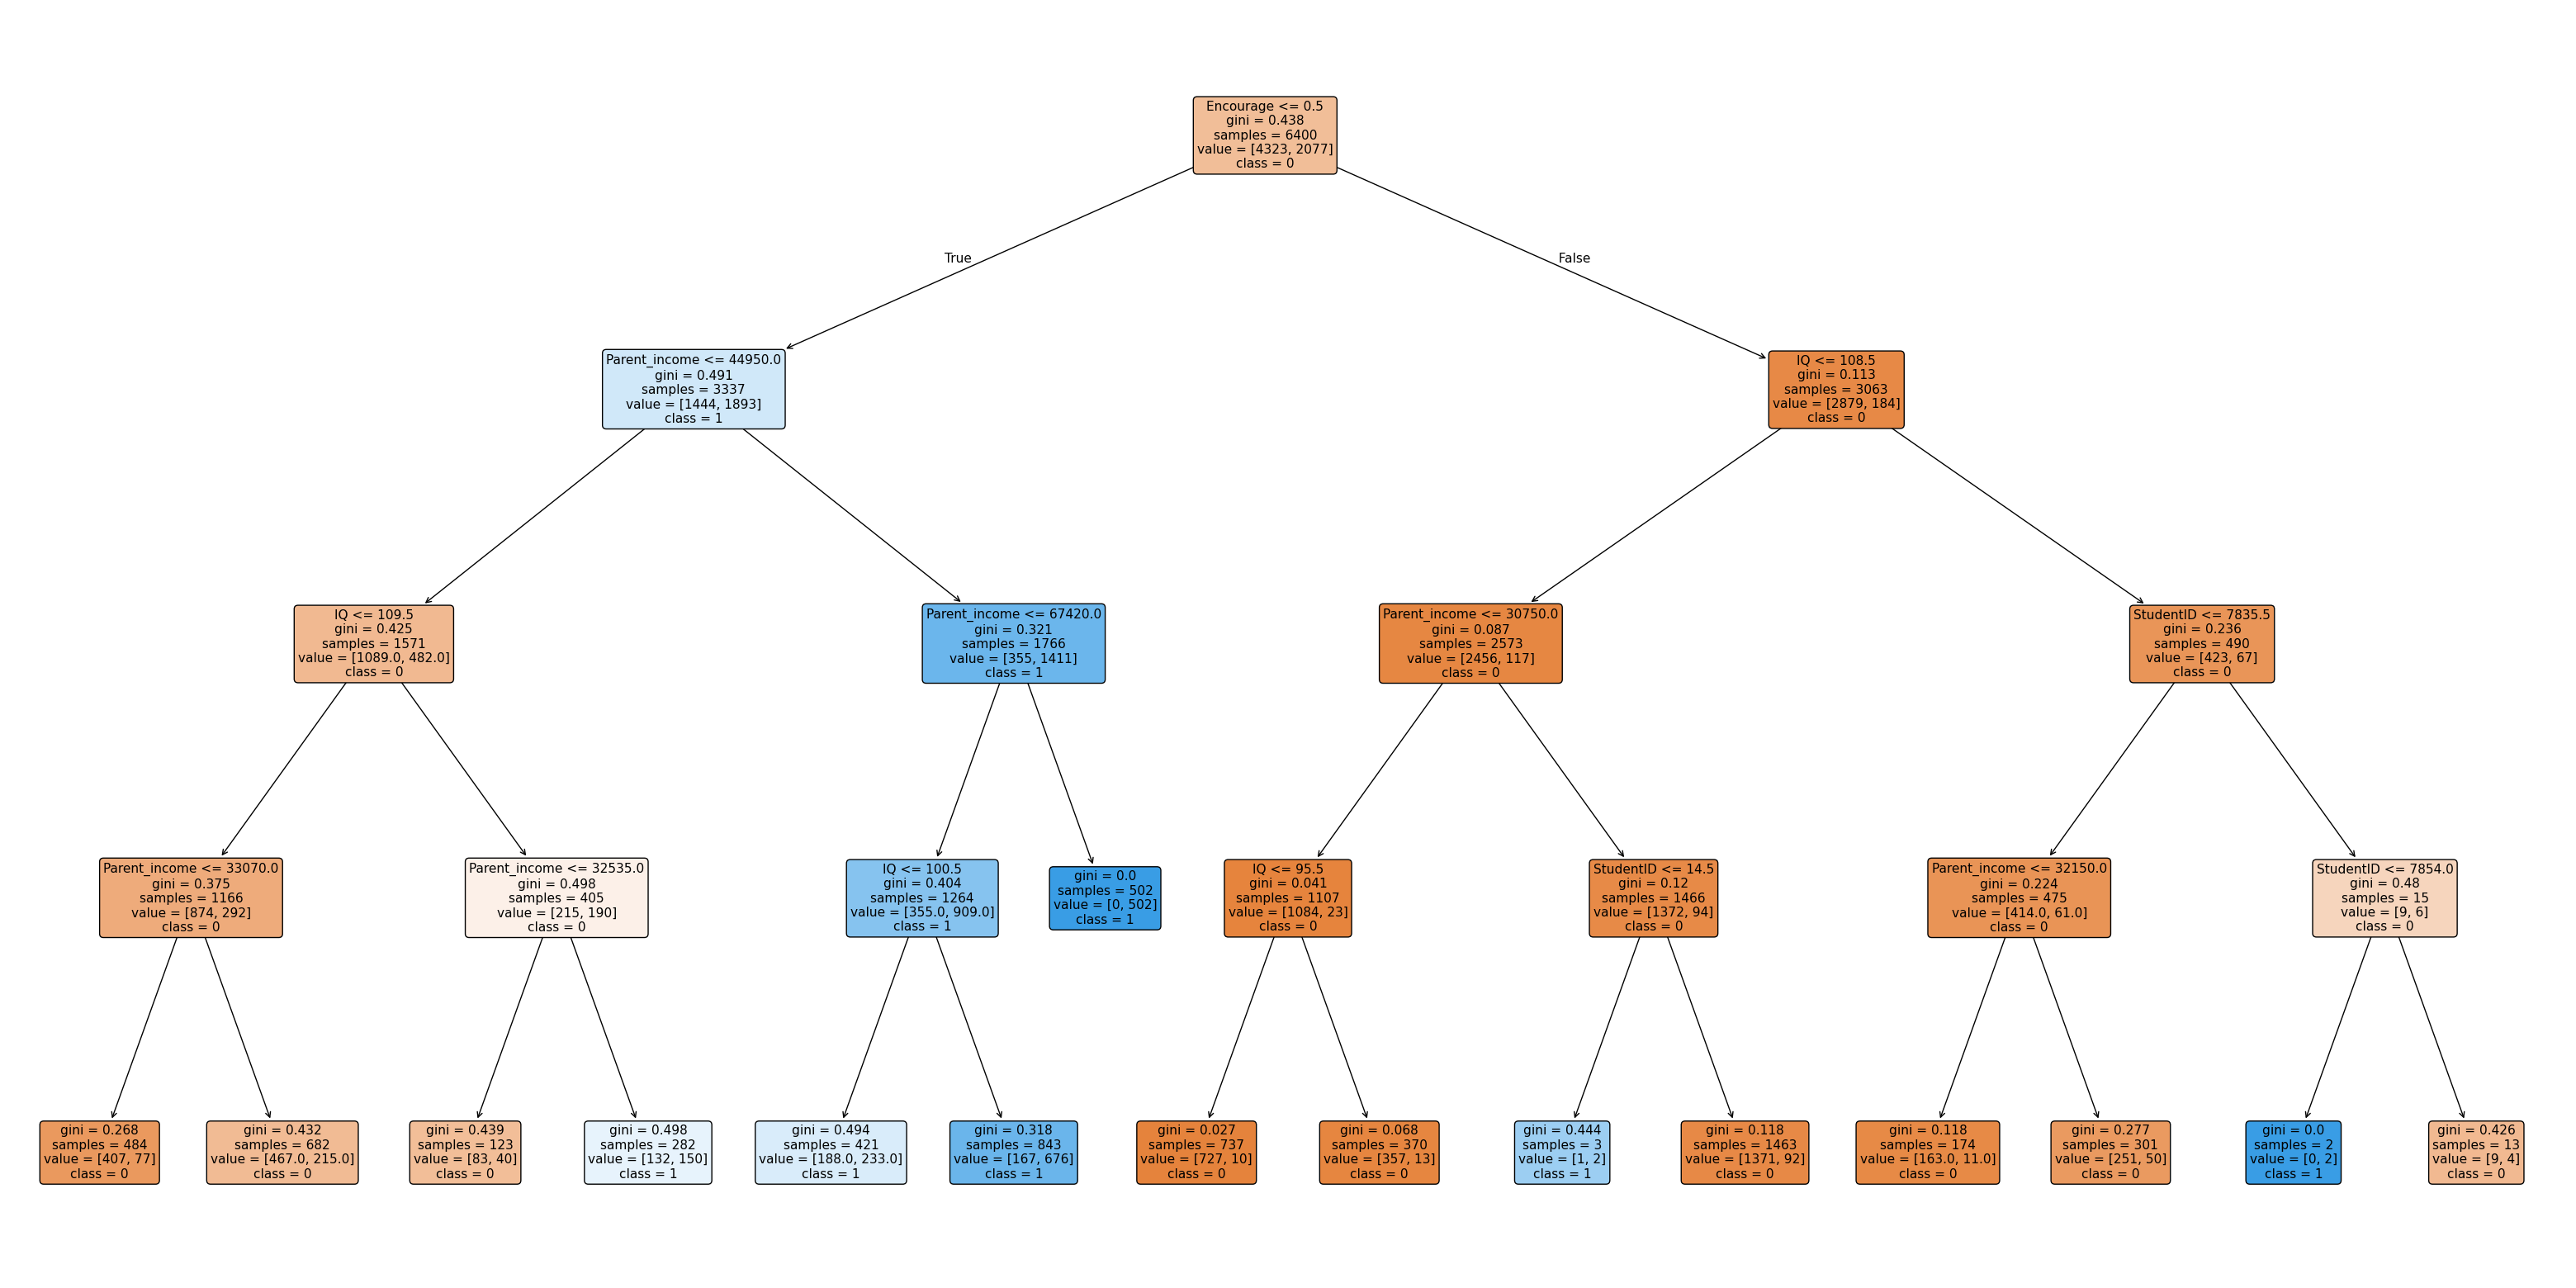

In [24]:
plt.figure(figsize=(40,20))
plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], rounded=True)
plt.show()

# **11. Feature Importance (Fitur yang Paling Berpengaruh)**


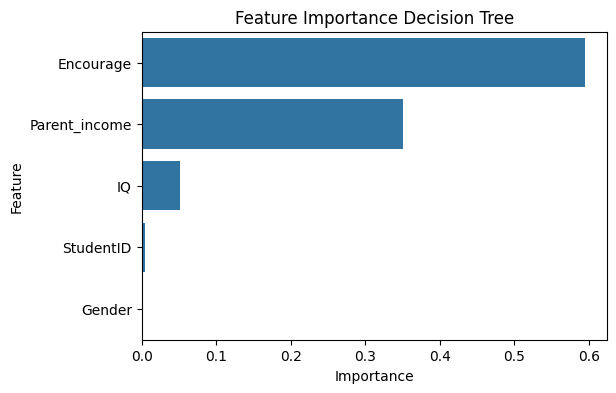


Feature Importance:
         Feature  Importance
4      Encourage    0.593935
2  Parent_income    0.350774
3             IQ    0.050962
0      StudentID    0.004329
1         Gender    0.000000


In [22]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance Decision Tree')
plt.show()

print("\nFeature Importance:")
print(feature_importance)

# Hyperparameter Tuning (max_depth)


In [23]:
scores = {}
for d in range(2, 9):
    m = DecisionTreeClassifier(max_depth=d, random_state=42)
    m.fit(X_train, y_train)
    acc = accuracy_score(y_test, m.predict(X_test))
    scores[d] = acc
    print(f"max_depth={d} → Akurasi = {acc:.4f}")

best_d = max(scores, key=scores.get)
print(f"\nNilai max_depth terbaik: {best_d} dengan akurasi {scores[best_d]:.4f}")

max_depth=2 → Akurasi = 0.8187
max_depth=3 → Akurasi = 0.8187
max_depth=4 → Akurasi = 0.8263
max_depth=5 → Akurasi = 0.8200
max_depth=6 → Akurasi = 0.8269
max_depth=7 → Akurasi = 0.8213
max_depth=8 → Akurasi = 0.8169

Nilai max_depth terbaik: 6 dengan akurasi 0.8269
